In [2]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [4]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [5]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [7]:
data = data.fillna(-1)

In [38]:
data['paid_tickets'] = data.field15 - data.field9

In [8]:
count = dict(data['userid'].value_counts())
data['count'] = data['userid'].apply(lambda x: count[x])

In [9]:
data['count'].value_counts().sort_index()

1      259504
2      138314
3       70359
4       41968
5       26210
        ...  
198       198
222       222
310       310
363       363
756       756
Name: count, Length: 114, dtype: int64

In [11]:
count

{'88a595f6f7754f656b33cca2c6addcb9c659c30bad00656779378af80209912a': 756,
 'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52': 363,
 'd4017f49f9e5cebdefabef5714f138ea0fc72410d19ac9997d416dc96dc01f23': 310,
 '98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b': 222,
 '2350f28919b7b4161f4e22c491cac8d5ae5347c4f52130b922651fbbb4f7381c': 198,
 'c2d39c54936961e415d536315954cf31d4a506334f65dfe96705297ca4d11a60': 193,
 'a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4': 185,
 '6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67': 177,
 '739eafb20f821b94d1d22146706a6c4d0375de292cd21ba3b6ba3278dc54fc93': 177,
 '350bc1455fa1adeef3346b956f87e23252b751efdbdec5b81d40fc8f4e5c2d2a': 167,
 '38188de7f244abad2947d65f588a7ea7818f465d9a63871fdf7fa2444318e7e1': 161,
 '4ff6d90fa7505838ff071e9a9e01208f5dfd3f5f237c74ff2e62c85a42522402': 157,
 '13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa': 149,
 'e139cfdfd8ccc2813af314294b72bcf5b2c0

In [12]:
top_users = data[data['count']>100]['userid'].value_counts()

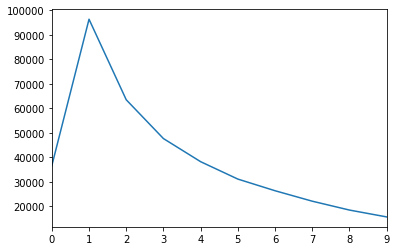

In [31]:
data.field16.value_counts().sort_index()[:10].plot()

In [33]:
data.field16.value_counts().sort_index()

0      36645
1      96383
2      63523
3      47684
4      38247
       ...  
332        2
335        2
337        1
339        2
340        2
Name: field16, Length: 332, dtype: int64

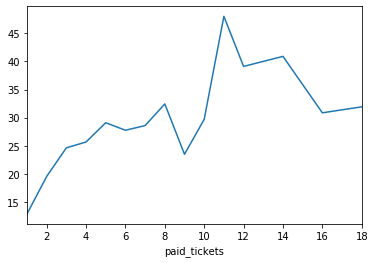

In [39]:
data.groupby('paid_tickets')['field16'].agg('mean').plot()
# data.groupby('field15')['field16'].agg('count').plot()

c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\python36\lib\sit

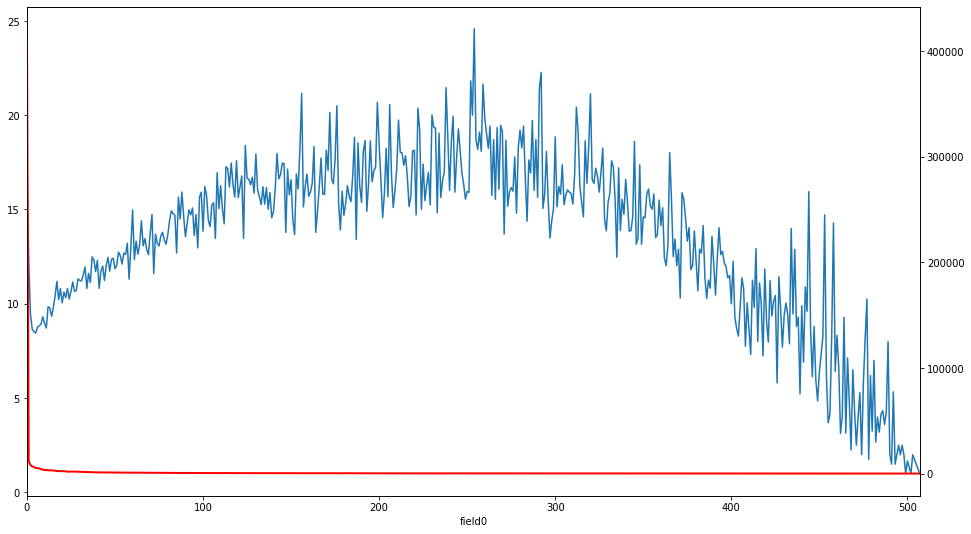

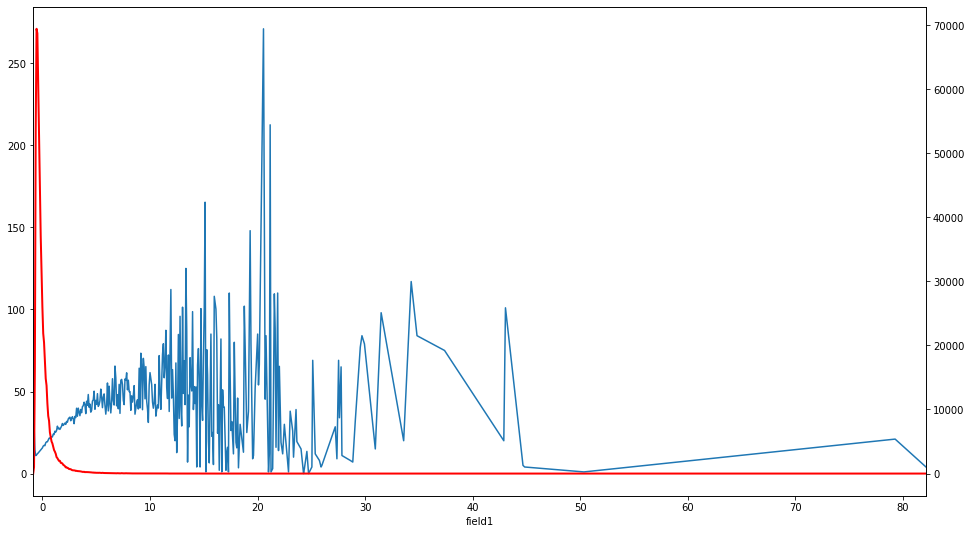

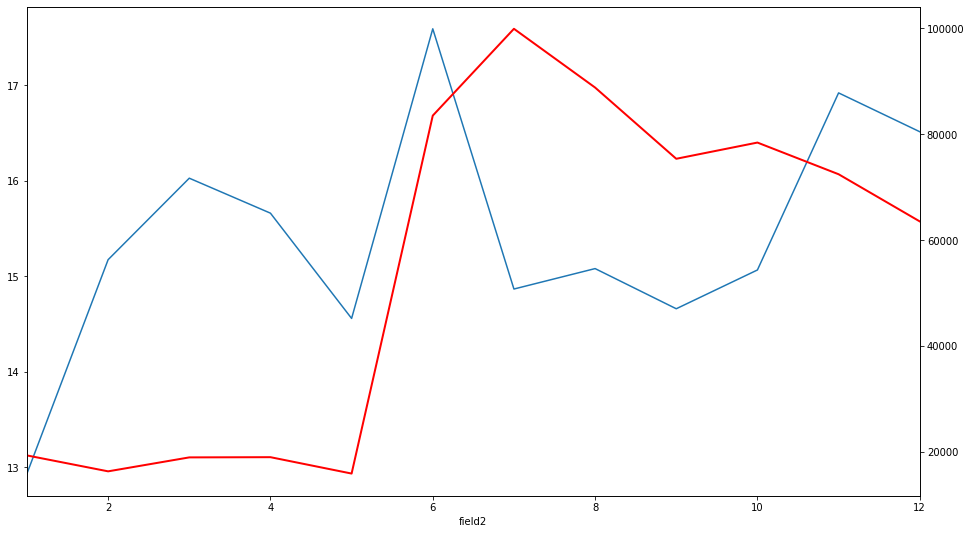

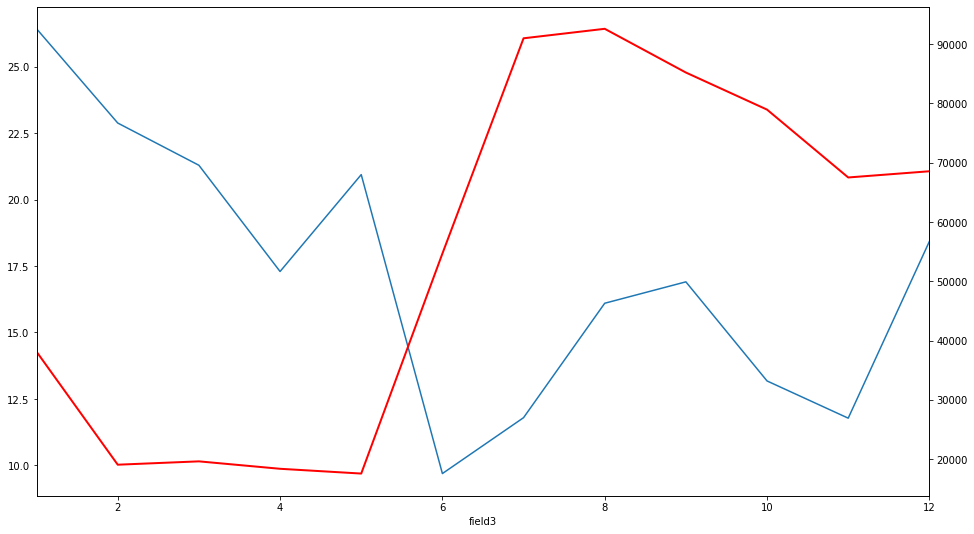

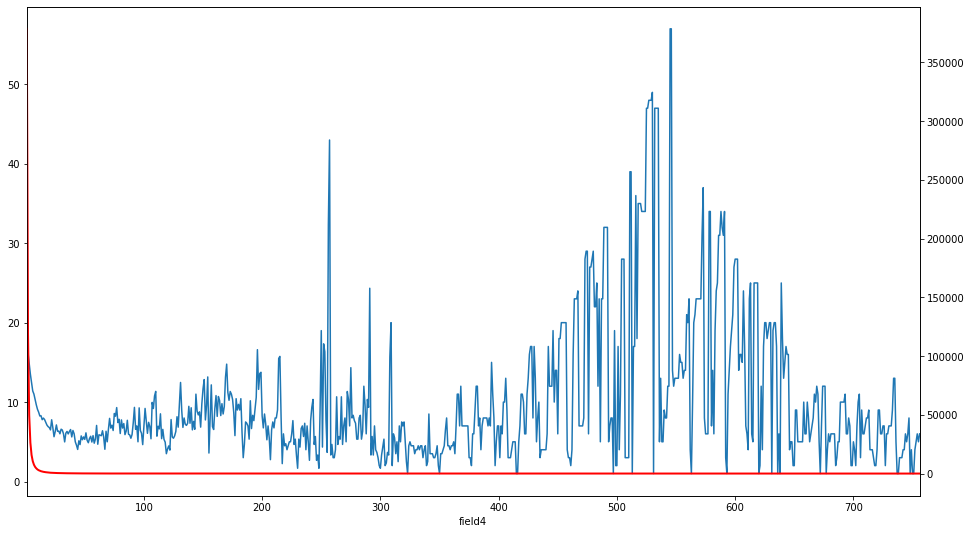

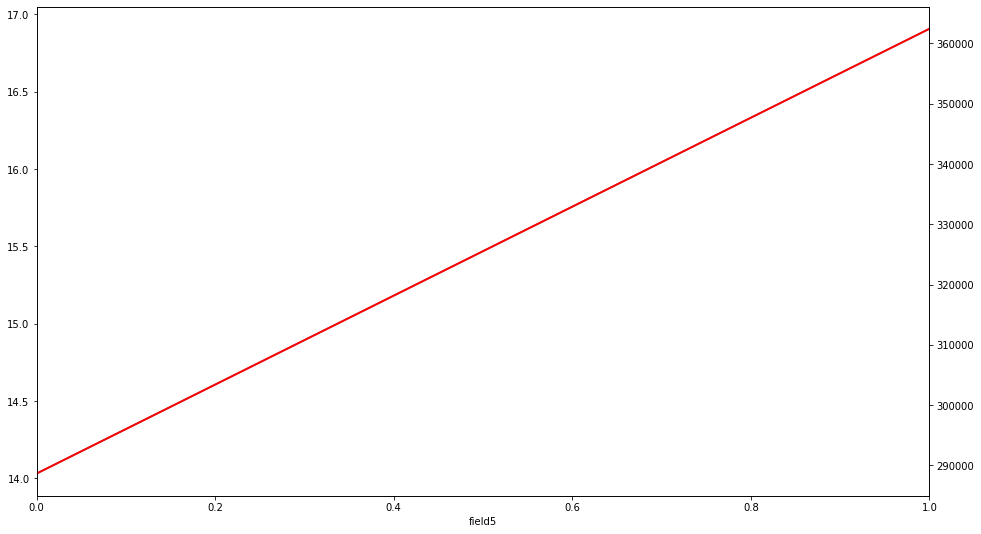

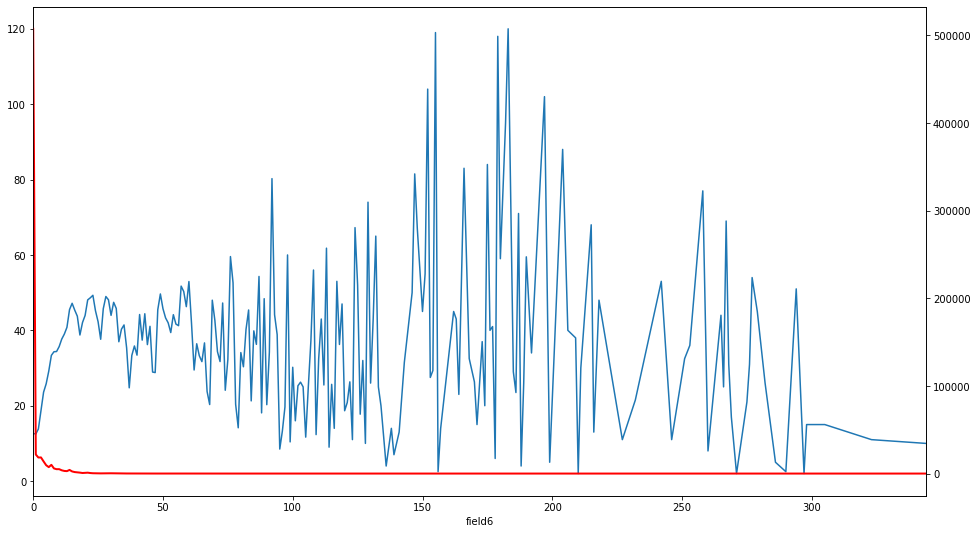

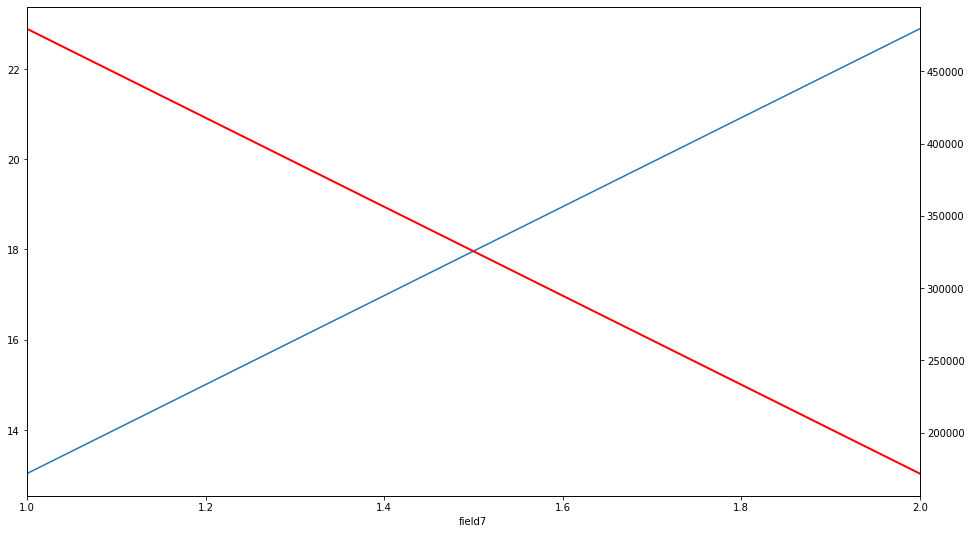

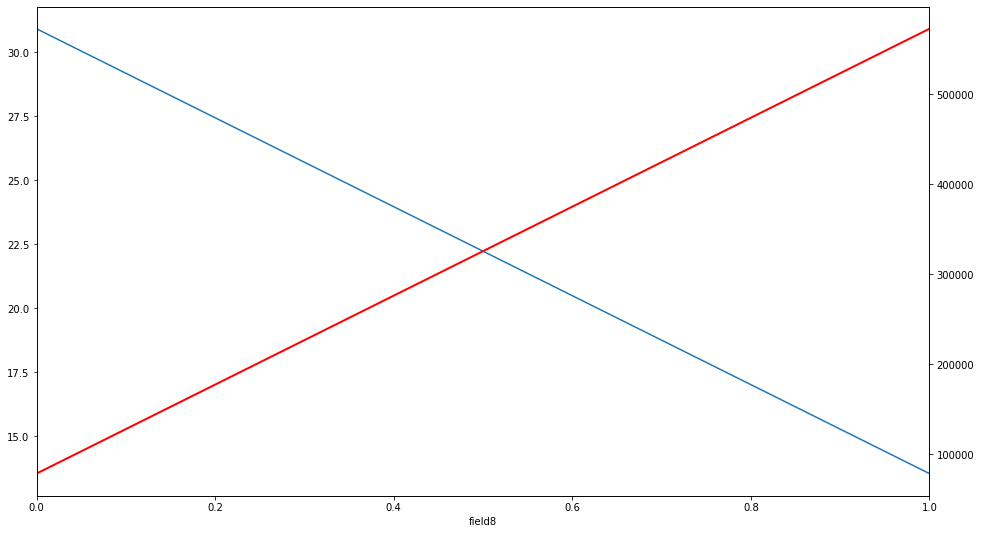

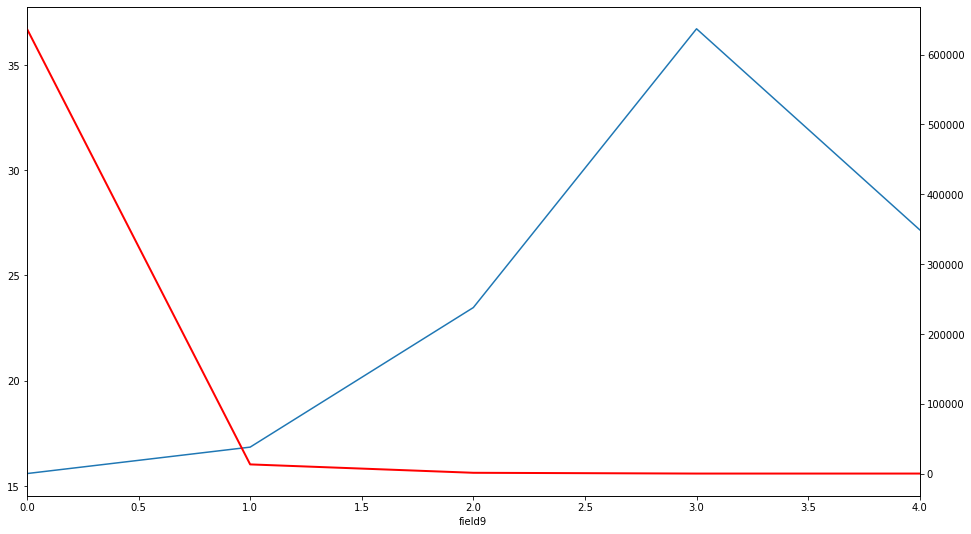

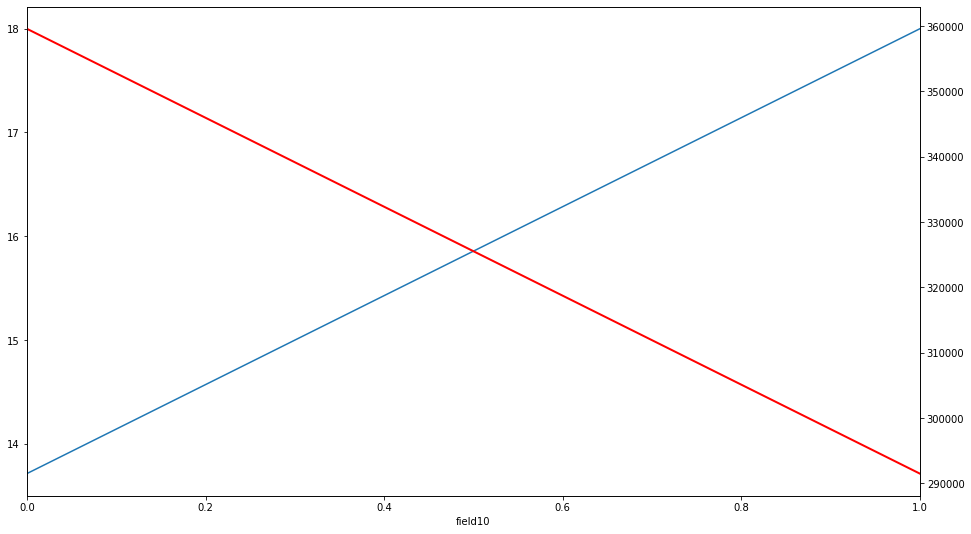

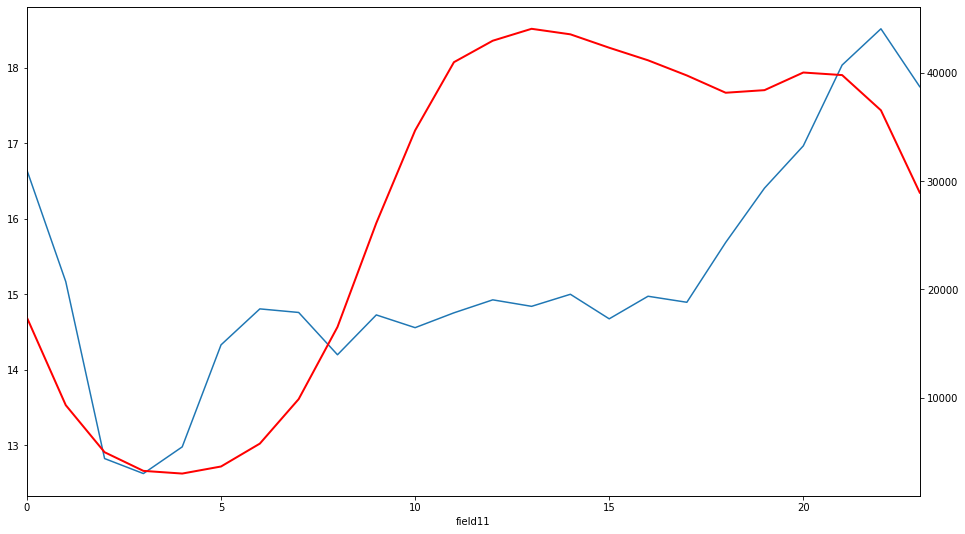

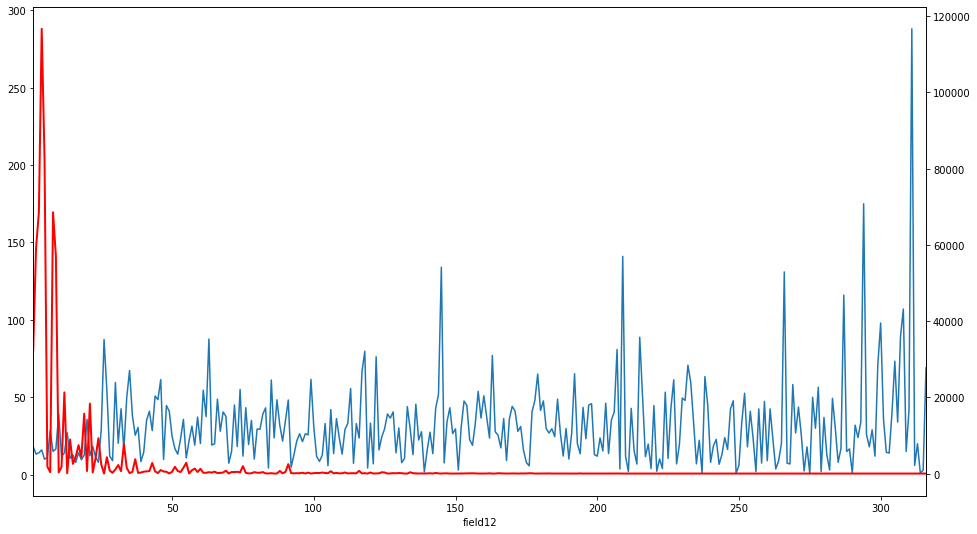

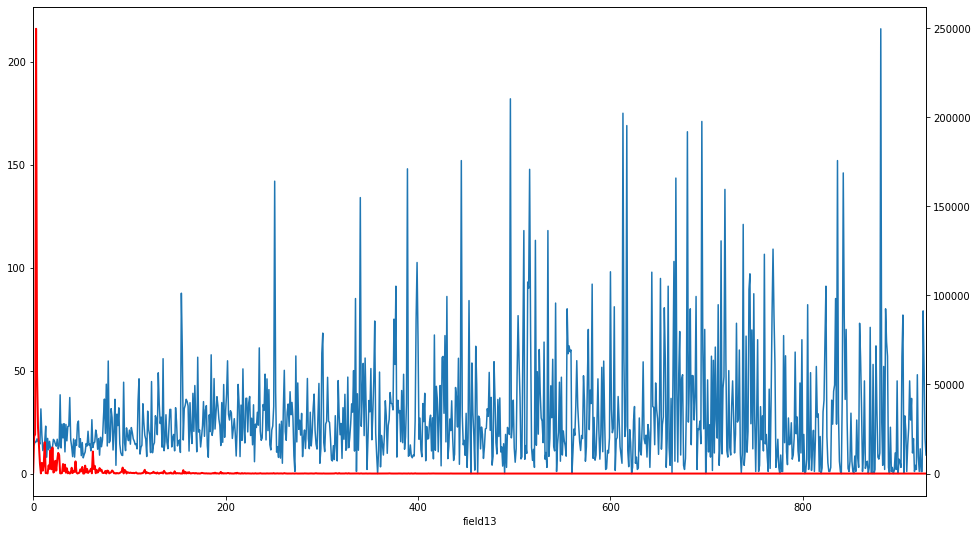

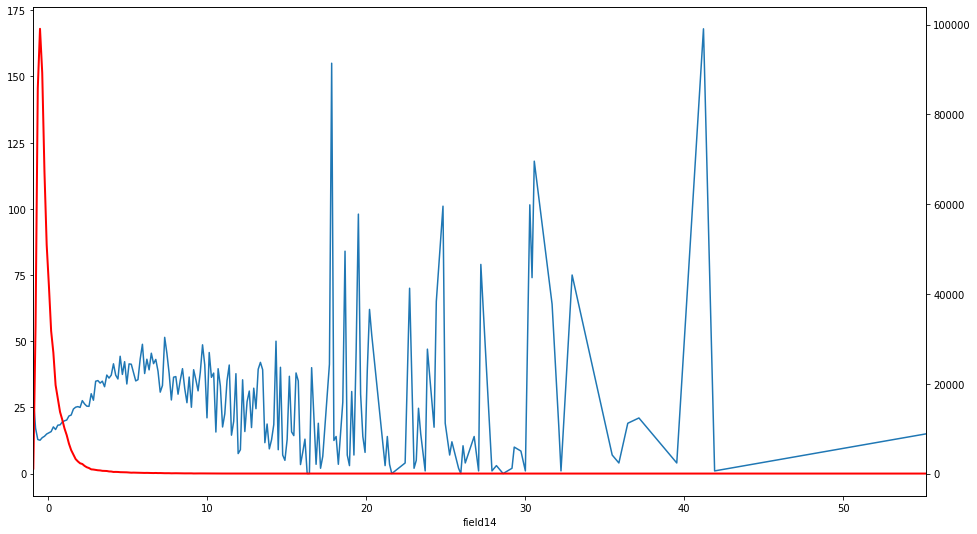

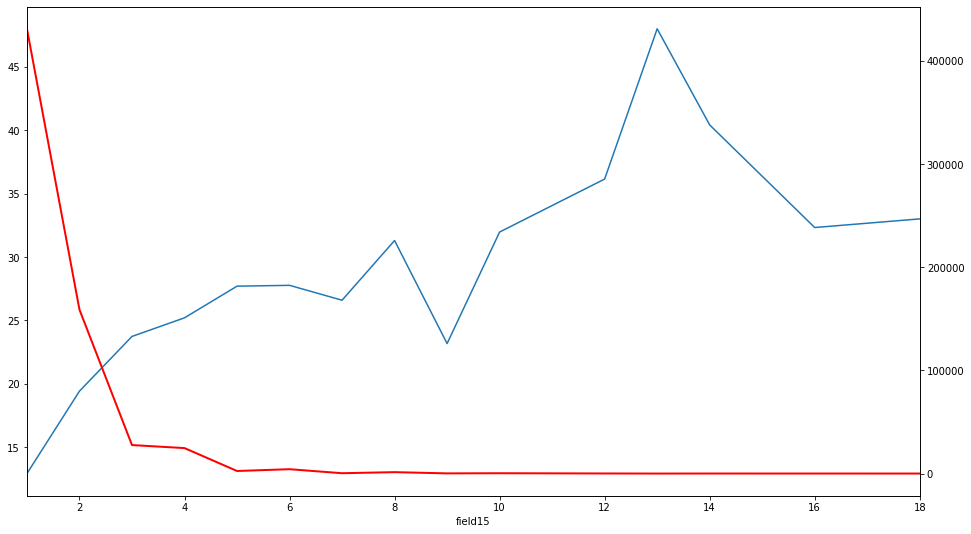

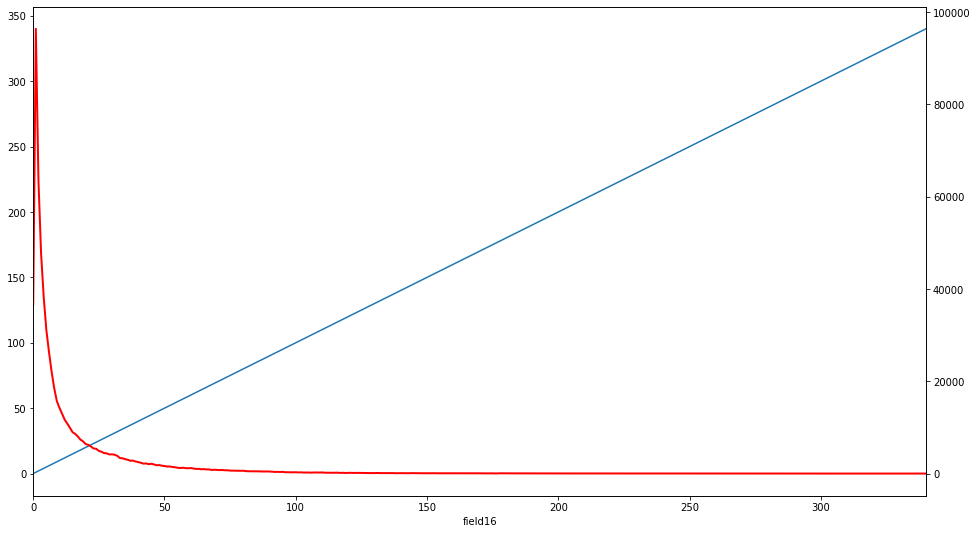

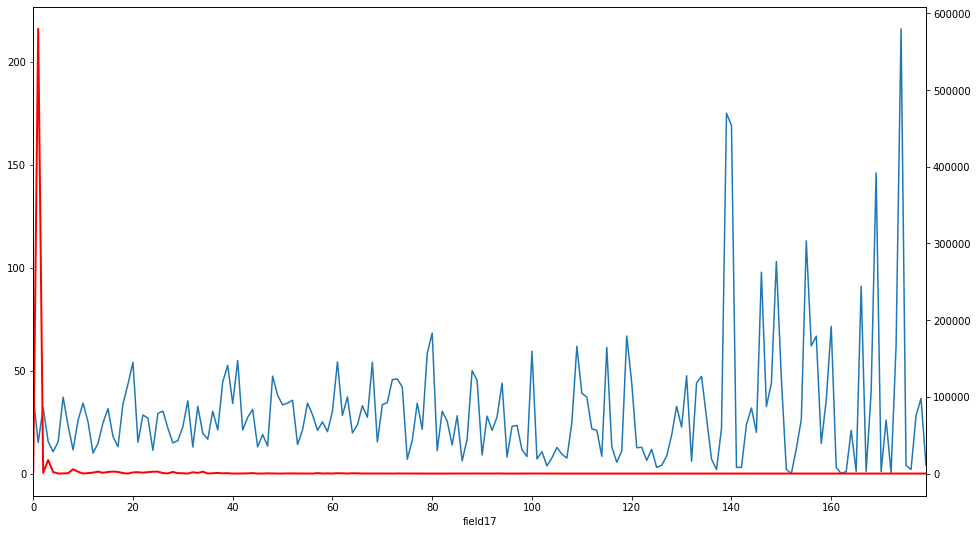

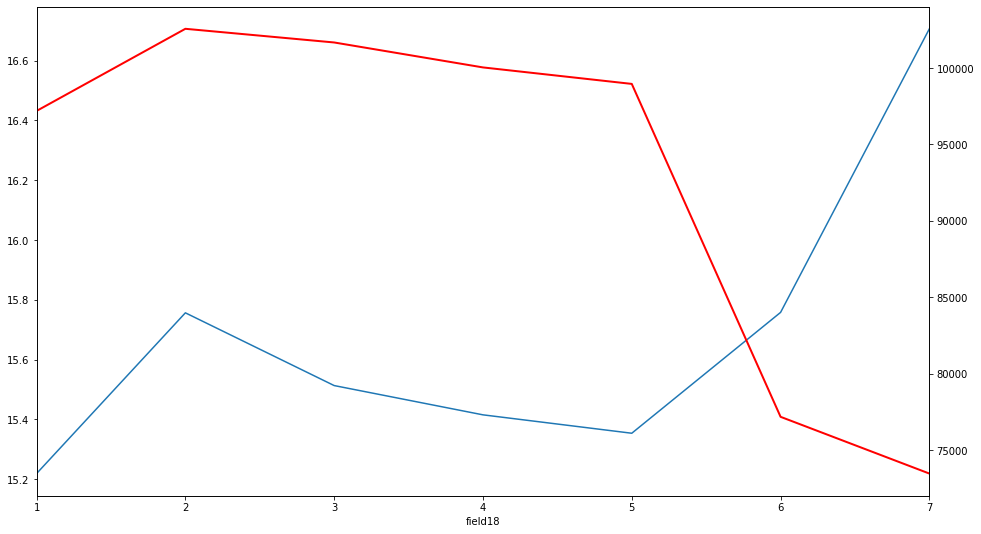

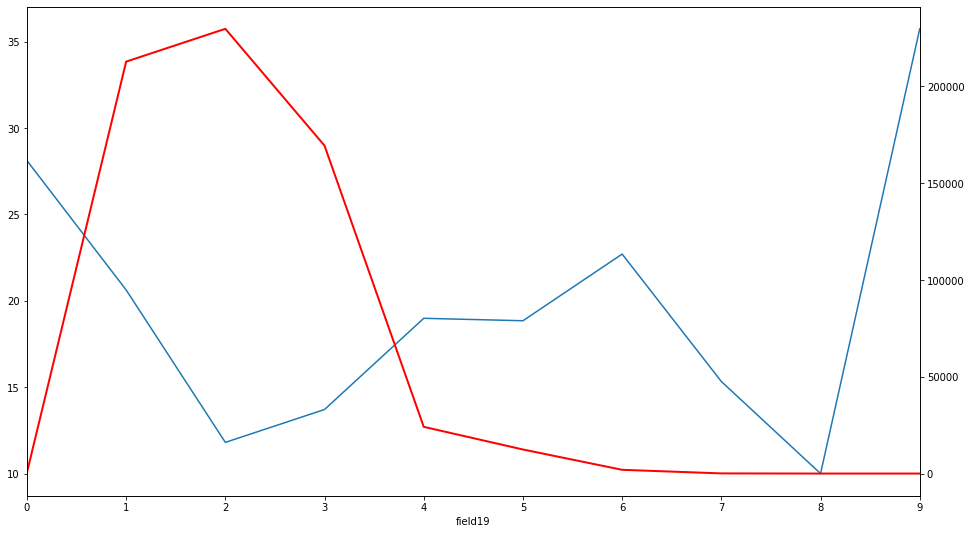

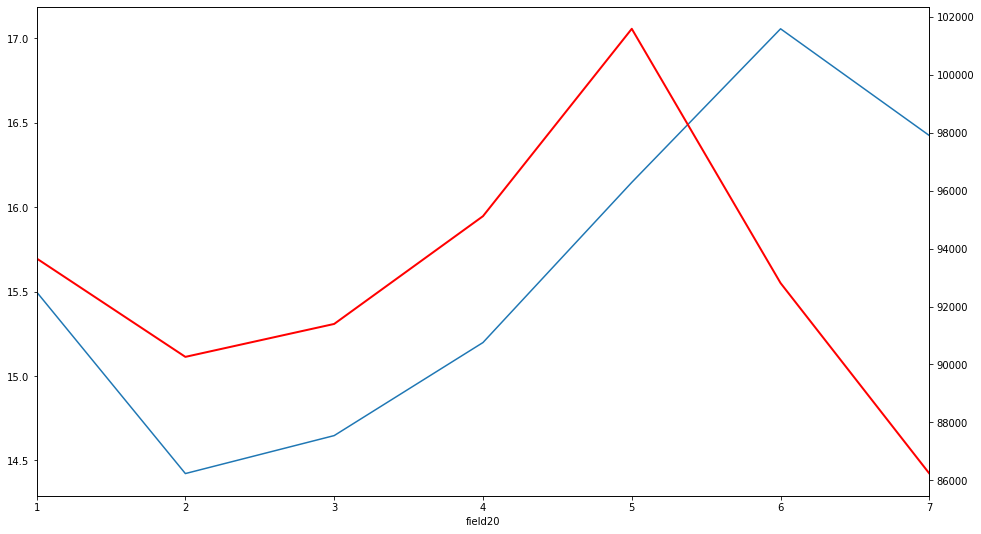

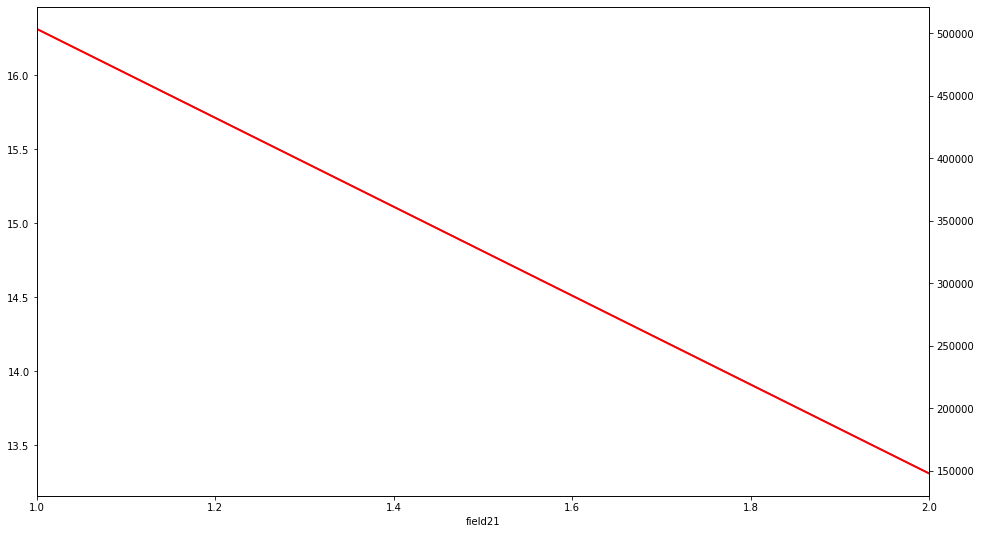

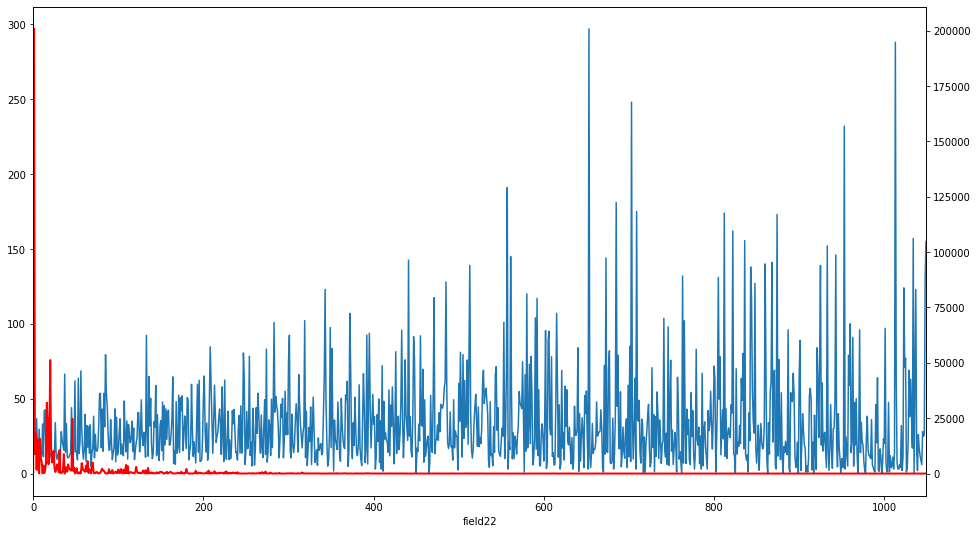

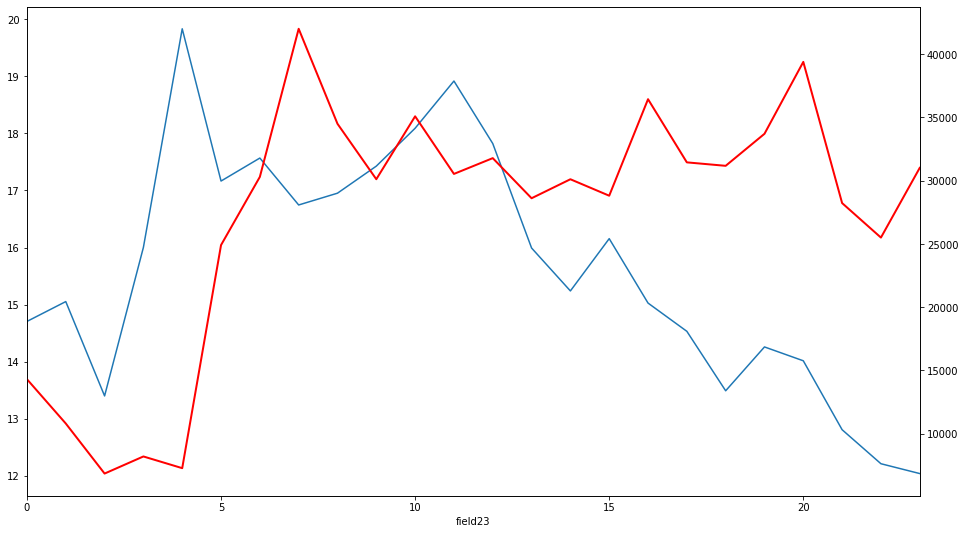

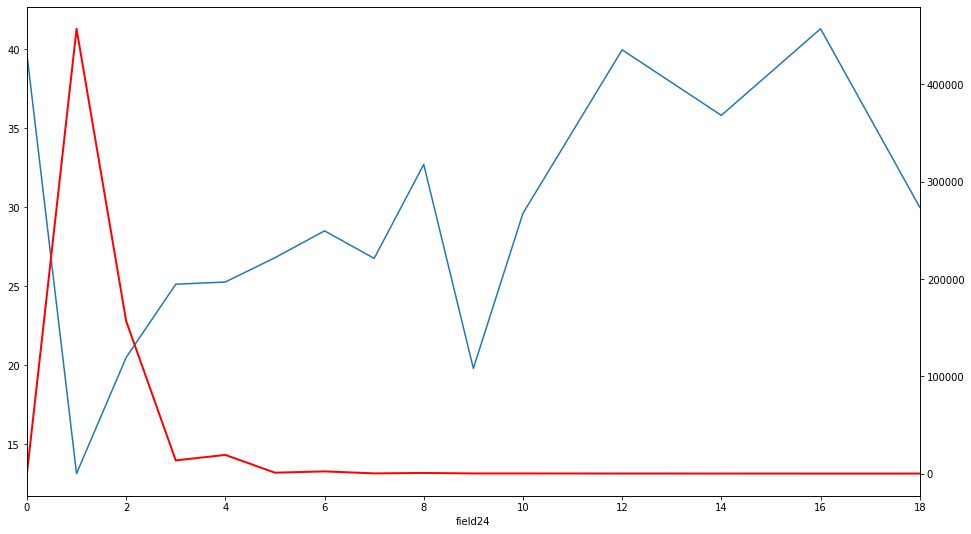

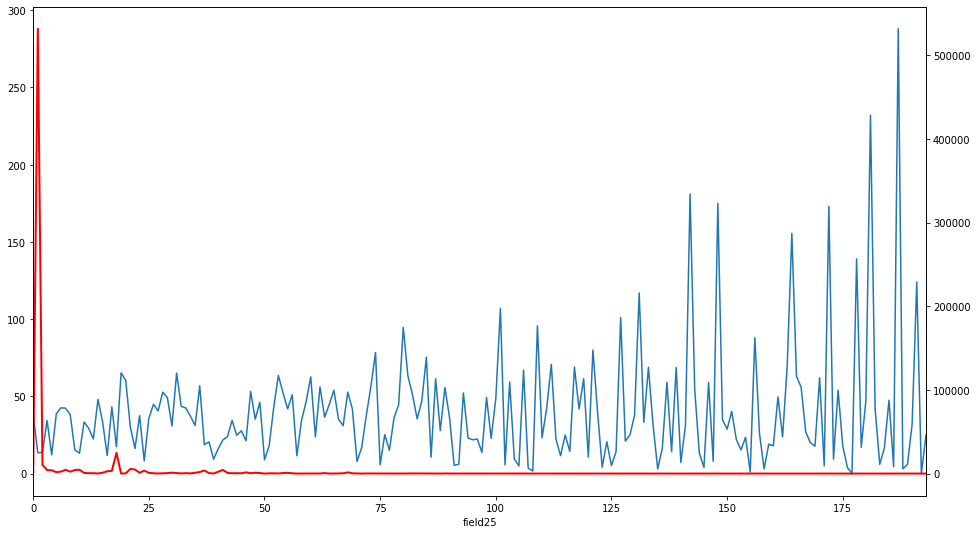

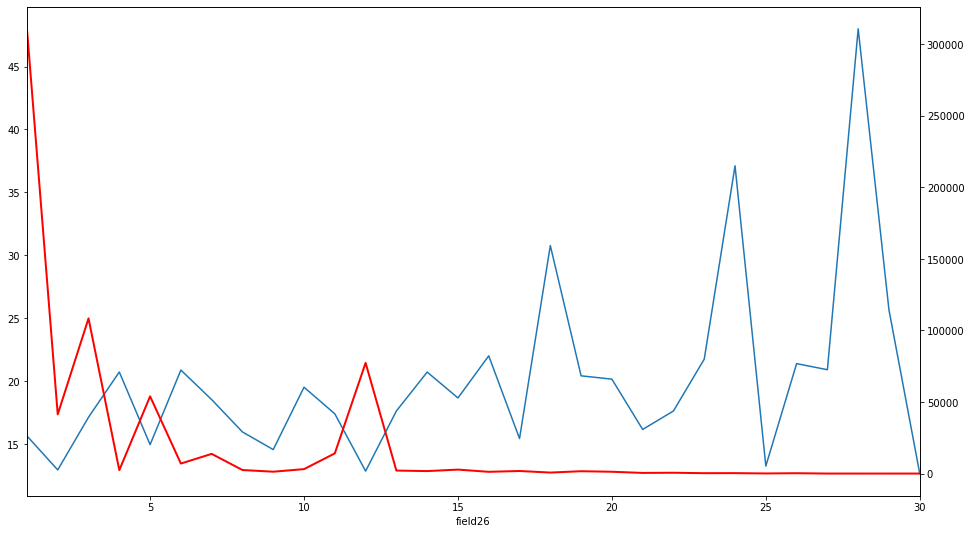

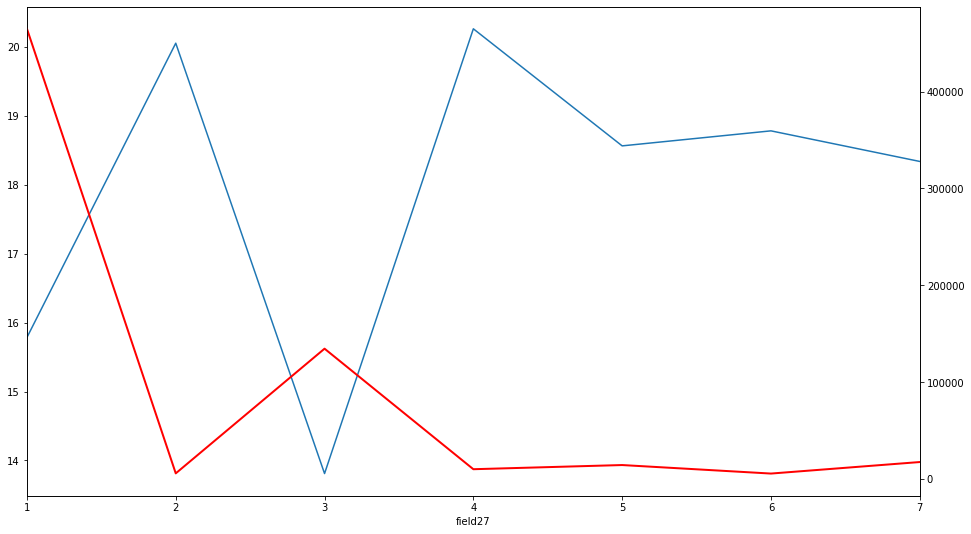

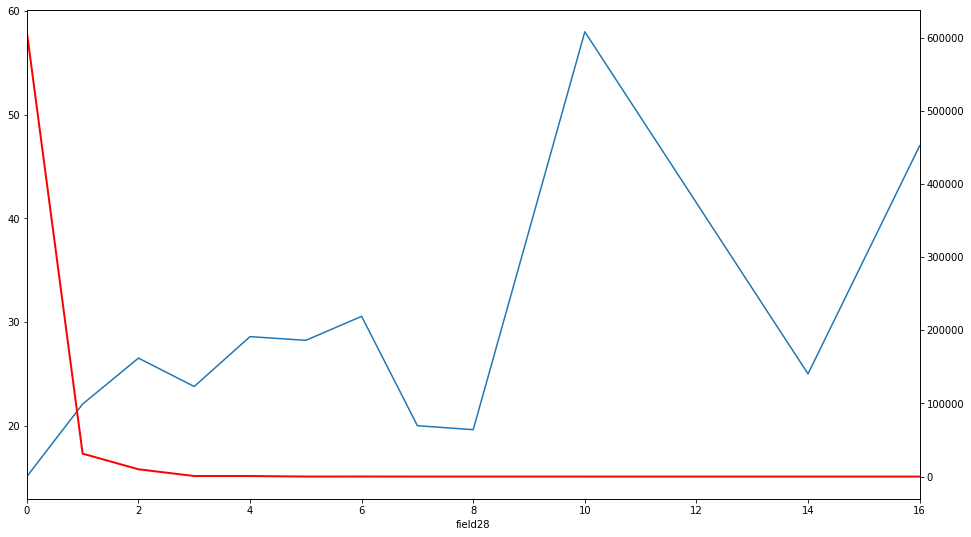

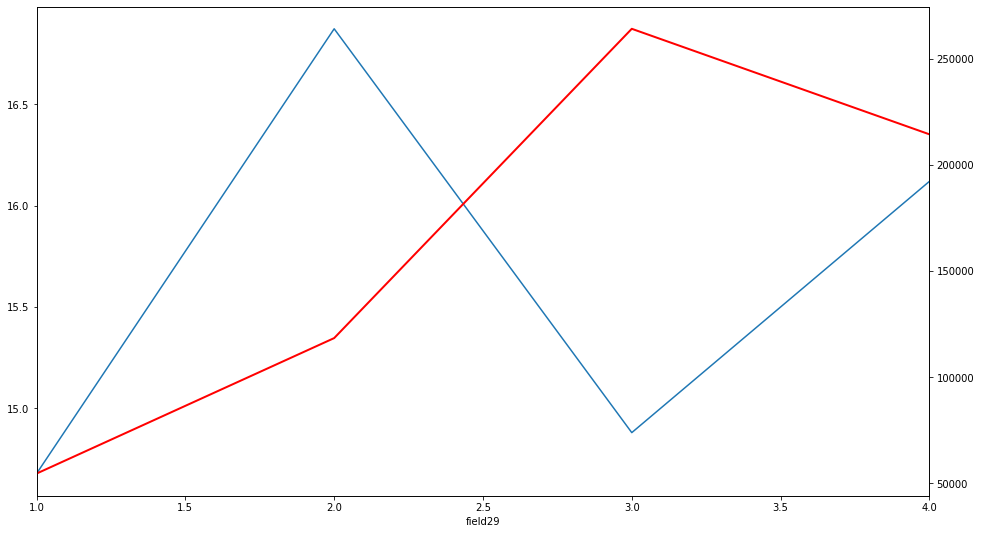

In [43]:
for f in [f'field{i}' for i in range(0,30)]:
    plt.figure(figsize=(16,9))
    ax=data.groupby(f)['field16'].agg('mean').plot()
    ax2=ax.twinx()
    ax2 = data.groupby(f)['field16'].agg('count').plot(color='red', linewidth=2)

In [45]:
data.field16.mean()

15.631981040353757

In [27]:
for month in range(1,13):
    print('----------   ',month)
    print(data[data['field3']==month]['field16'].value_counts().iloc[:5])

----------    1
1    3155
2    2211
3    1678
4    1533
0    1344
Name: field16, dtype: int64
----------    2
1    2979
2    1814
3    1201
0    1170
4    1009
Name: field16, dtype: int64
----------    3
1    3237
2    2037
3    1427
0    1314
4    1108
Name: field16, dtype: int64
----------    4
1    3115
2    1878
3    1361
0    1244
4    1096
Name: field16, dtype: int64
----------    5
1    2718
2    1598
3    1191
0    1031
4     901
Name: field16, dtype: int64
----------    6
1    10404
2     7317
3     5472
4     4099
0     3895
Name: field16, dtype: int64
----------    7
1    12922
2     9164
3     7476
4     6297
5     5193
Name: field16, dtype: int64
----------    8
1    12238
2     8375
3     6279
4     5087
5     4189
Name: field16, dtype: int64
----------    9
1    11429
2     7668
3     5715
4     4607
0     4358
Name: field16, dtype: int64
----------    10
1    12295
2     7946
3     6092
4     4946
0     4935
Name: field16, dtype: int64
----------    11
1    11673
2     

In [14]:
top_places = [4,5,8,9,3,2]

No handles with labels found to put in legend.


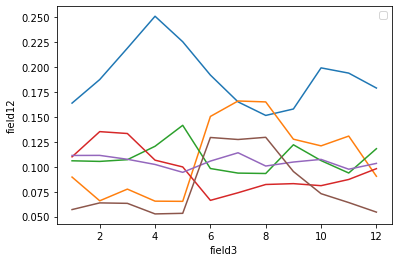

In [21]:
flights_by_month = data.groupby('field3')['field12'].agg('count')
for place in top_places:
#     place=4
    place_stat=     data[data['field12']==place].groupby('field3')['field12'].agg('count') / flights_by_month
    sns.lineplot(y=place_stat,x=place_stat.index)
plt.legend()

In [19]:
place_stat

field3
1     0.163793
2     0.187408
3     0.218876
4     0.250898
5     0.225334
6     0.191924
7     0.165025
8     0.151443
9     0.157896
10    0.199139
11    0.193869
12    0.178917
Name: field12, dtype: float64

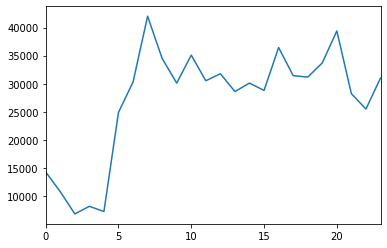

In [24]:
data['field23'].value_counts().sort_index().plot()

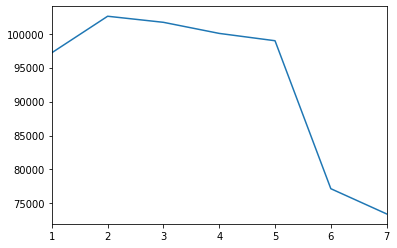

In [26]:
data['field18'].value_counts().sort_index().plot()

In [63]:
data[data['field12']==place].groupby('field3')['field12'].agg('count')#.plot()

field3
1      2174
2      1215
3      1242
4       968
5       936
6      7069
7     11581
8     11988
9      8112
10     5761
11     4325
12     3736
Name: field12, dtype: int64

field3
1     38109
2     19060
3     19623
4     18370
5     17565
6     54657
7     90962
8     92563
9     85189
10    78935
11    67494
12    68540
Name: field12, dtype: int64